In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_processed=pd.read_csv('processed_data.csv')

In [3]:
data_processed.head(10)

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,...,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ,log_price
0,13.0,85.0,35.0,60.000000,200.0000,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.079181
1,13.0,100.0,29.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7.255273
2,2.0,60.0,22.0,80.000000,300.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,7.146128
3,5.0,70.0,29.0,60.000000,200.0000,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.301030
4,45.0,75.0,33.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7.380211
5,23.0,110.0,24.0,67.723845,303.1307,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.342423
6,9.0,55.0,33.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6.995635
7,9.0,85.0,43.0,60.000000,200.0000,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.146128
8,3.0,100.0,23.0,80.000000,300.0000,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7.278754
9,45.0,75.0,31.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6.690196


# sklearnでmodelを作成する
 目的変数と特徴量に分けていく

In [4]:
unscaled_inputs=data_processed.iloc[:,:-1]
unscaled_inputs

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,...,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,13.0,85.0,35.0,60.0,200.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,13.0,100.0,29.0,60.0,200.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2.0,60.0,22.0,80.0,300.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5.0,70.0,29.0,60.0,200.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,45.0,75.0,33.0,60.0,200.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747527,10.0,40.0,35.0,60.0,200.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
747528,8.0,85.0,25.0,60.0,200.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747529,22.0,100.0,16.0,50.0,150.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747530,6.0,90.0,10.0,80.0,400.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


次にダミー変数以外の特徴量を標準化していく

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
unscaled_inputs1=unscaled_inputs.iloc[:,:5]
unscaled_inputs2=unscaled_inputs.iloc[:,5:]

In [7]:
apartment_scaler=StandardScaler()
apartment_scaler.fit(unscaled_inputs1)

StandardScaler()

In [8]:
raw_scaled_inputs=apartment_scaler.transform(unscaled_inputs1)

In [9]:
unscaled_inputs1.columns

Index(['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）'], dtype='object')

In [10]:
scaled_inputs1=pd.DataFrame(raw_scaled_inputs)
scaled_inputs1

,0,1,2,3,4
0,0.124767,0.996255,0.657820,-0.747833,-0.701291
1,0.124767,1.555455,0.150291,-0.747833,-0.701291
2,-0.797742,0.064255,-0.441826,1.188593,-0.021289
3,-0.546148,0.437055,0.150291,-0.747833,-0.701291
4,2.808430,0.623455,0.488644,-0.747833,-0.701291
...,...,...,...,...,...
747527,-0.126826,-0.681345,0.657820,-0.747833,-0.701291
747528,-0.294555,0.996255,-0.188062,-0.747833,-0.701291
747529,0.879547,1.555455,-0.949356,-1.716046,-1.041292
747530,-0.462284,1.182655,-1.456885,1.188593,0.658713


In [11]:
scaled_inputs1.columns=['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）']
scaled_inputs1

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）
0,0.124767,0.996255,0.657820,-0.747833,-0.701291
1,0.124767,1.555455,0.150291,-0.747833,-0.701291
2,-0.797742,0.064255,-0.441826,1.188593,-0.021289
3,-0.546148,0.437055,0.150291,-0.747833,-0.701291
4,2.808430,0.623455,0.488644,-0.747833,-0.701291
...,...,...,...,...,...
747527,-0.126826,-0.681345,0.657820,-0.747833,-0.701291
747528,-0.294555,0.996255,-0.188062,-0.747833,-0.701291
747529,0.879547,1.555455,-0.949356,-1.716046,-1.041292
747530,-0.462284,1.182655,-1.456885,1.188593,0.658713


In [12]:
final_scaled_inputs=pd.concat([scaled_inputs1,unscaled_inputs2],axis=1)
final_scaled_inputs

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,...,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,0.124767,0.996255,0.657820,-0.747833,-0.701291,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.124767,1.555455,0.150291,-0.747833,-0.701291,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.797742,0.064255,-0.441826,1.188593,-0.021289,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.546148,0.437055,0.150291,-0.747833,-0.701291,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.808430,0.623455,0.488644,-0.747833,-0.701291,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747527,-0.126826,-0.681345,0.657820,-0.747833,-0.701291,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
747528,-0.294555,0.996255,-0.188062,-0.747833,-0.701291,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747529,0.879547,1.555455,-0.949356,-1.716046,-1.041292,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747530,-0.462284,1.182655,-1.456885,1.188593,0.658713,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
target=data_processed['log_price']

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(final_scaled_inputs,target,test_size=0.2,random_state=365)

In [15]:
x_train

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,...,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
729736,-0.294555,0.437055,0.996173,-0.747833,-0.701291,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204385,-0.546148,0.064255,0.065703,-0.747833,-0.701291,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
470103,5.324363,0.809855,-0.949356,-0.747833,-0.701291,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
456702,-0.462284,0.623455,1.672878,-0.747833,-1.041292,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
657376,0.627954,2.487455,0.319467,-0.747833,-1.041292,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538885,-0.797742,0.250655,-0.357238,1.188593,0.658713,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
172460,2.808430,-1.613345,0.319467,-0.747833,-0.701291,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
275291,-0.126826,0.809855,0.911585,-0.747833,-0.701291,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4897,-0.210691,0.623455,-0.272650,-0.747833,-0.021289,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [16]:
reg=LinearRegression()

In [17]:
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_hat=reg.predict(x_train)

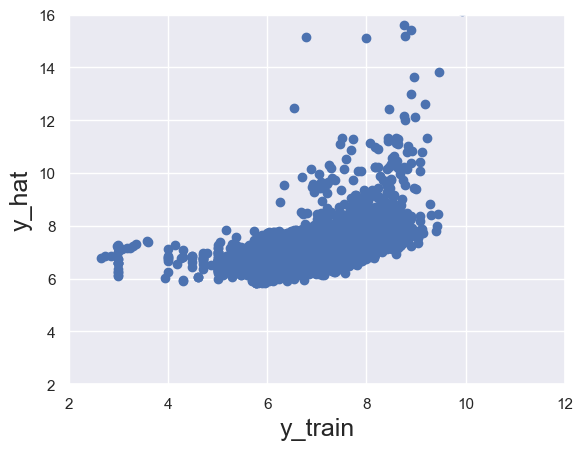

In [19]:
plt.scatter(y_train,y_hat)

plt.xlabel('y_train',size=18)
plt.ylabel('y_hat',size=18)
plt.xlim(2,12)
plt.ylim(2,16)

plt.show()

/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_2234/1238912141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat-y_train)


Text(0.5, 1.0, 'Residuals')

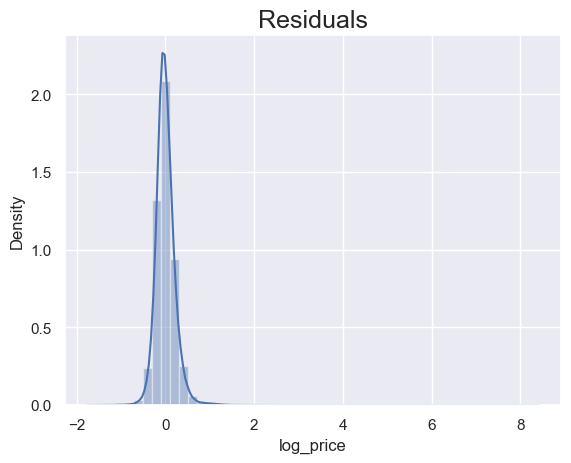

In [20]:
sns.distplot(y_hat-y_train)

plt.title('Residuals',size=18)

In [21]:
reg.score(x_train,y_train)

0.6212282267181831

In [22]:
reg.intercept_

6.929284957768727

In [23]:
reg.coef_

array([-0.05741416,  0.11382296, -0.18293922, -0.0222629 ,  0.06283473,
        0.03918079,  0.35390064,  0.09360214,  0.18417489,  0.09372404,
       -0.03289827,  0.08372141, -0.2280909 , -0.06068415, -0.04416353,
       -0.00648807,  0.06772572,  0.02025259,  0.12305853,  0.05706728,
        0.13393927,  0.07848446,  0.02194893,  0.11871316, -0.04661352,
       -0.12387411,  0.0922168 ,  0.00626327, -0.17629497,  0.02907834,
       -0.07662767,  0.07739615,  0.10282159,  0.06556007, -0.03178926,
       -0.0851237 , -0.11059397,  0.06670424,  0.05983798, -0.03547523,
       -0.07322445,  0.08132565, -0.02708616,  0.07429961,  0.0090191 ])

In [24]:
reg_summary=pd.DataFrame(final_scaled_inputs.columns.values,columns=['Feature'])
reg_summary['coefficient']=reg.coef_
reg_summary

,Feature,coefficient
0,time_from_station,-0.057414
1,area,0.113823
2,building_age,-0.182939
3,建ぺい率（％）,-0.022263
4,容積率（％）,0.062835
5,Hokkaido_Tohoku,0.039181
6,Kanto,0.353901
7,Chubu,0.093602
8,Kinki,0.184175
9,Chugoku,0.093724


作成したモデルに関してテストデータを用いて、テストを行う

In [25]:
y_hat_test=reg.predict(x_test)

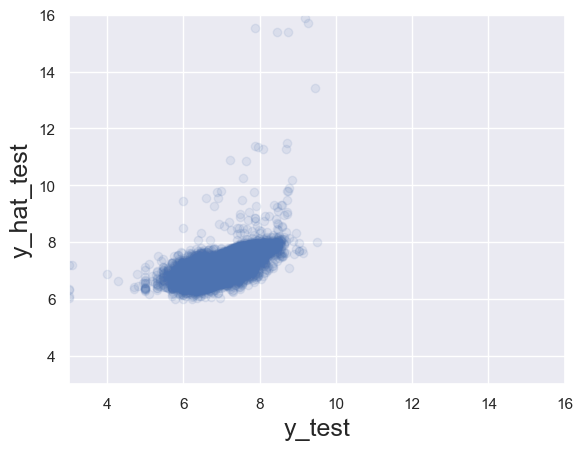

In [26]:
plt.scatter(y_test,y_hat_test,alpha=0.1)
plt.xlabel('y_test',size=18)
plt.ylabel('y_hat_test',size=18)
plt.xlim(3,16)
plt.ylim(3,16)
plt.show()

In [27]:
df_prediction=pd.DataFrame(y_hat_test,columns=['prediction'])
df_prediction['y_test']=y_test
df_prediction

,prediction,y_test
0,7.144647,NaN
1,6.747093,NaN
2,7.465933,NaN
3,7.170970,NaN
4,7.468765,NaN
...,...,...
149502,7.588482,NaN
149503,7.515214,NaN
149504,7.634971,6.544068
149505,7.702953,NaN


In [28]:
y_test=y_test.reset_index(drop=True)
df_prediction['y_test']=y_test

In [29]:
df_prediction

,prediction,y_test
0,7.144647,7.146128
1,6.747093,6.342423
2,7.465933,7.792392
3,7.170970,7.176091
4,7.468765,7.716003
...,...,...
149502,7.588482,7.397940
149503,7.515214,7.518514
149504,7.634971,7.681241
149505,7.702953,7.724276


In [30]:
df_prediction['Residual']=df_prediction['y_test']-df_prediction['prediction']

In [31]:
df_prediction['Difference%']=np.absolute(df_prediction['Residual']/df_prediction['y_test']*100)
df_prediction

,prediction,y_test,Residual,Difference%
0,7.144647,7.146128,0.001481,0.020722
1,6.747093,6.342423,-0.404670,6.380370
2,7.465933,7.792392,0.326458,4.189449
3,7.170970,7.176091,0.005121,0.071363
4,7.468765,7.716003,0.247238,3.204227
...,...,...,...,...
149502,7.588482,7.397940,-0.190542,2.575602
149503,7.515214,7.518514,0.003300,0.043891
149504,7.634971,7.681241,0.046270,0.602378
149505,7.702953,7.724276,0.021323,0.276048


In [32]:
df_prediction.describe()

,prediction,y_test,Residual,Difference%
count,149507.000000,149507.000000,149507.000000,149507.000000
mean,7.240304,7.239803,-0.000501,2.226838
std,0.283915,0.357066,0.222718,2.424507
min,5.985843,3.000000,-7.635317,0.000101
25%,7.051153,7.041393,-0.110536,0.786198
50%,7.252219,7.278754,0.017451,1.667529
75%,7.445773,7.477121,0.130024,2.966230
max,15.875371,9.505150,1.673785,139.912123


In [33]:
df_prediction.sort_values(by='Difference%')

,prediction,y_test,Residual,Difference%
23655,7.505142,7.505150,0.000008,0.000101
38899,7.518522,7.518514,-0.000008,0.000109
96638,7.361737,7.361728,-0.000009,0.000127
131031,7.255263,7.255273,0.000009,0.000129
40468,7.113934,7.113943,0.000009,0.000132
...,...,...,...,...
8324,6.092879,3.000000,-3.092879,103.095963
59960,6.315814,3.000000,-3.315814,110.527119
35881,6.364117,3.000000,-3.364117,112.137246
135188,7.211365,3.079181,-4.132184,134.197488


In [34]:
##予測値がかなり大きく出てしまっているところがあるので、価格を下げる変数を忘れているのかどうか
##ラッソ回帰などでそもそも不要だと考えられるカラムを消す
##多重線形性に気をつけながら信頼区間などを求める

## sklearnを用いて分析する
自由度修正済み決定係数は重回帰分析において有用である

In [35]:
reg.score(x_train,y_train)

0.6212282267181831

In [36]:
x_train.shape

(598025, 45)

### Formula for Ajusted R^2

$R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [37]:
r2=reg.score(x_train,y_train)

n=x_train.shape[0]

p=x_train.shape[1]

adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2

0.621199722824572

F回帰で単線形回帰を行い、説明力があるかどうか確認する

In [38]:
from sklearn.feature_selection import f_regression

In [39]:
f_regression(x_train,y_train)

(array([3.14764895e+04, 9.24621535e+04, 2.51928968e+05, 6.29885110e+02,
        8.51891897e+03, 1.30029956e+04, 5.26187466e+04, 7.18106303e+03,
        3.60773728e+03, 1.50841033e+03, 2.55123825e+03, 1.20642145e+04,
        1.91330894e+01, 5.13514520e+00, 1.87489578e+03, 6.93284143e+03,
        1.52603676e+02, 6.06683938e+03, 1.14383632e-01, 1.10678032e+01,
        5.93437620e-01, 6.18922072e+01, 1.34735369e+01, 6.36508629e+00,
        3.25427326e+03, 3.22465525e+04, 3.01032132e+03, 5.12593095e+00,
        7.88456075e+03, 4.14915390e+03, 7.67728402e+02, 4.00681867e-01,
        6.56517632e+03, 1.15153361e+00, 8.49796683e+03, 7.45994268e+02,
        1.76274673e+00, 1.32465900e+04, 4.65577862e+01, 1.82510566e+03,
        2.24614983e+02, 3.59004449e+03, 6.13571974e+01, 2.83148580e+01,
        1.74008960e+01]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.25200633e-139,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.000

In [40]:
p_values=f_regression(x_train,y_train)[1]
p_values

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.25200633e-139,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.21933420e-005, 2.34464816e-002, 0.00000000e+000, 0.00000000e+000,
       4.72250218e-035, 0.00000000e+000, 7.35207702e-001, 8.78449802e-004,
       4.41093187e-001, 3.63382449e-015, 2.41972811e-004, 1.16390006e-002,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.35712802e-002,
       0.00000000e+000, 0.00000000e+000, 7.17569959e-169, 5.26737564e-001,
       0.00000000e+000, 2.83228774e-001, 0.00000000e+000, 3.76372585e-164,
       1.84282788e-001, 0.00000000e+000, 8.90401587e-012, 0.00000000e+000,
       9.09962135e-051, 0.00000000e+000, 4.76821893e-015, 1.03138549e-007,
       3.02725893e-005])

In [41]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.023, 0.   , 0.   , 0.   , 0.   ,
       0.735, 0.001, 0.441, 0.   , 0.   , 0.012, 0.   , 0.   , 0.   ,
       0.024, 0.   , 0.   , 0.   , 0.527, 0.   , 0.283, 0.   , 0.   ,
       0.184, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

p値が大きいものは取り除いても良いことにする
※ただし、多重線形性はなく、各変数が独立であるという仮定のもとでF回帰が行われているのでその点に注意する

In [77]:
reg_summary=pd.DataFrame(x_train.columns.values,columns=['features'])
reg_summary

,features
0,time_from_station
1,area
2,building_age
3,建ぺい率（％）
4,容積率（％）
5,Hokkaido_Tohoku
6,Kanto
7,Chubu
8,Kinki
9,Chugoku


In [79]:
reg_summary['coefficients']=reg.coef_
reg_summary['p-values']=p_values.round(3)
reg_summary

,features,coefficients,p-values
0,time_from_station,-0.057414,0.000
1,area,0.113823,0.000
2,building_age,-0.182939,0.000
3,建ぺい率（％）,-0.022263,0.000
4,容積率（％）,0.062835,0.000
5,Hokkaido_Tohoku,0.039181,0.000
6,Kanto,0.353901,0.000
7,Chubu,0.093602,0.000
8,Kinki,0.184175,0.000
9,Chugoku,0.093724,0.000


# モデルの修正
sklearnの分析から不要だと思われるカラムは、ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ、鉄骨造,２ＬＤ＋Ｓ,２ＬＫ,３ＬＤ	
この二つを消しても一度、回帰してみる

In [93]:
modified_x_train=x_train.drop(['ＳＲＣ、鉄骨造','ＳＲＣ、ＲＣ、鉄骨造','２ＬＤ＋Ｓ','２ＬＫ','３ＬＤ'],axis=1)
modified_x_test=x_test.drop(['ＳＲＣ、鉄骨造','ＳＲＣ、ＲＣ、鉄骨造','２ＬＤ＋Ｓ','２ＬＫ','３ＬＤ'],axis=1)

In [94]:
reg.fit(modified_x_train,y_train)

LinearRegression()

In [95]:
modified_y_hat=reg.predict(modified_x_train)

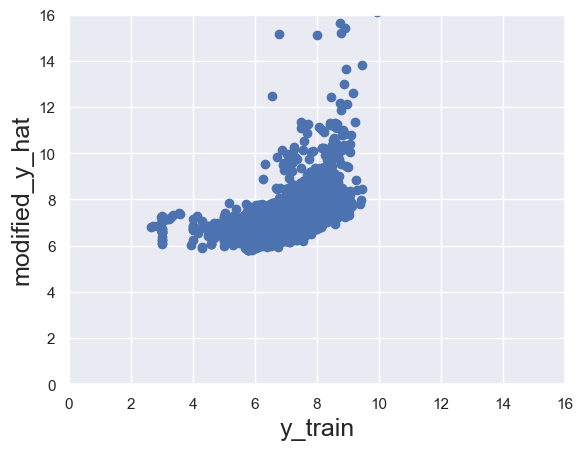

In [96]:
plt.scatter(y_train,modified_y_hat)
plt.xlabel('y_train',size=18)
plt.ylabel('modified_y_hat',size=18)
plt.xlim(0,16)
plt.ylim(0,16)
plt.show()

In [97]:
reg.score(modified_x_train,y_train)

0.6211950172921589

結局あんまり変わっていない

# statsmodelsの最小二乗法でモデルを作成する

In [51]:
print(x_train.dtypes)
print(y_train.dtypes)

time_from_station    float64
area                 float64
building_age         float64
建ぺい率（％）              float64
容積率（％）               float64
Hokkaido_Tohoku         bool
Kanto                   bool
Chubu                   bool
Kinki                   bool
Chugoku                 bool
Sikoku                  bool
Kyusyu                  bool
木造                      bool
軽量鉄骨造                   bool
鉄骨造                     bool
ＲＣ                      bool
ＲＣ、鉄骨造                  bool
ＳＲＣ                     bool
ＳＲＣ、鉄骨造                 bool
ＳＲＣ、ＲＣ                  bool
ＳＲＣ、ＲＣ、鉄骨造              bool
改装済                     bool
スタジオ                    bool
メゾネット                   bool
１ＤＫ                     bool
１Ｋ                      bool
１ＬＤＫ                    bool
１ＬＫ                     bool
１Ｒ                      bool
２ＤＫ                     bool
２Ｋ                      bool
２ＬＤ＋Ｓ                   bool
２ＬＤＫ                    bool
２ＬＫ                     bool
３ＤＫ           

In [66]:
x_train.columns.values
##valuesはデータをnumpy配列にしてくれる

array(['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '木造', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', 'スタジオ', 'メゾネット', '１ＤＫ', '１Ｋ',
       '１ＬＤＫ', '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ',
       '３Ｋ', '３ＬＤ', '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ',
       '６ＬＤＫ'], dtype=object)

In [67]:
dummies_column_list=['Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '木造', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', 'スタジオ', 'メゾネット', '１ＤＫ', '１Ｋ', '１ＬＤＫ',
       '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ', '３Ｋ', '３ＬＤ',
       '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ', '６ＬＤＫ']

In [68]:
for column in dummies_column_list:
     x_train[column]=x_train[column].replace({True:1,False:0})

In [72]:
x_train_np = x_train.values
y_train_np = y_train.values
x_train2 = sm.add_constant(x_train_np)
results = sm.OLS(y_train_np, x_train2).fit()
##statsmodelsで回帰分析するとき、ダミー変数はTrue,Falseではなくて、0,1

In [73]:
x_train_np

array([[-0.29455514,  0.43705503,  0.99617289, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54614849,  0.06425501,  0.0657027 , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.32436318,  0.80985506, -0.94935569, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12682623,  0.80985506,  0.91158469, ...,  0.        ,
         0.        ,  0.        ],
       [-0.21069068,  0.62345505, -0.2726501 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.46228404, -0.30854502, -1.71064948, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 2.179e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:26:38   Log-Likelihood:                 58973.
No. Observations:              598025   AIC:                        -1.179e+05
Df Residuals:                  597979   BIC:                        -1.173e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9293      0.005   1280.924      0.000       6.919       6.940
x1            -0.0574      0.000   -186.002      0.000      -0.058      -0.057
x2             0.1138      0.000    254.372      0.000       0.113       0.115
x3            -0.1829      0.000   -551.436      0.000      -0.184      -0.182
x4            -0.0223      0.000    -48.756      0.000      -0.023      -0.021
x5             0.0628      0.000    132.668      0.000       0.062       0.064
x6             0.0392      0.005      7.872      0.000       0.029       0.049
x7             0.3539      0.005     72.954      0.000       0.344       0.363
x8             0.0936      0.005     18.928      0.000       0.084       0.103
x9             0.1842      0.005     37.811      0.000       0.175       0.194
x10            0.0937      0.005     17.603      0.000       0.083       0.104
x11           -0.0329      0.006     -5.599      0.000      -0.044      -0.021
x12            0.0837      0.005     16.873      0.000       0.074       0.093
x13           -0.2281      0.025     -8.978      0.000      -0.278      -0.178
x14           -0.0607      0.049     -1.236      0.216      -0.157       0.036
x15           -0.0442      0.004    -10.729      0.000      -0.052      -0.036
x16           -0.0065      0.002     -3.119      0.002      -0.011      -0.002
x17            0.0677      0.013      5.412      0.000       0.043       0.092
x18            0.0203      0.002      9.487      0.000       0.016       0.024
x19            0.1231      0.018      6.754      0.000       0.087       0.159
x20            0.0571      0.009      6.626      0.000       0.040       0.074
x21            0.1339      0.127      1.058      0.290      -0.114       0.382
x22            0.0785      0.001    116.536      0.000       0.077       0.080
x23            0.0219      0.026      0.836      0.403      -0.030       0.073
x24            0.1187      0.041      2.914      0.004       0.039       0.199
x25           -0.0466      0.002    -20.939      0.000      -0.051      -0.042
x26           -0.1239      0.002    -72.352      0.000      -0.127      -0.121
x27            0.0922      0.002     47.775      0.000       0.088       0.096
x28            0.0063      0.061      0.103      0.918      -0.113       0.125
x29           -0.1763      0.003    -54.854      0.000      -0.183      -0.170
x30            0.0291      0.002     13.645      0.000       0.025       0.033
x31           -0.0766      0.007    -11.541      0.000      -0.090      -0.064
x32            0.0774      0.073      1.059      0.290      -0.066       0.221
x33            0.1028      0.002     65.896      0.000       0.100       0.106
x34            0.0656      0.043      1.524      0.128      -0.019       0.150
x35           -0.0318      0.003    -12.229      0.000      -0.037      -0.027
x3

t検定は、2群による検定でt値が推定量でp値はt分布においてt値より外側の確率
f検定は、3群以上による検定ですなわち重回帰分析において複数の変数に関する検定で一気にモデル一つの検定ができる
これはsklearnで検証するf回帰とは異なると思われる。f回帰はむしろt検定に近いような概念であるはず（f検定であるが、変数が一つでやっているので
実質的にはt検定と同じことでライブラリの名前がf回帰になっている）
これでstatsmodelsにおける検定は、これで終わりでt検定で出したp値から不要なカラムを特定する

# p値から不要だと考えられるカラムを削除してもう一回分析してみる

In [100]:
x_train.columns.values[[13,20,22,27,31,33,36,42,44]]

array(['軽量鉄骨造', 'ＳＲＣ、ＲＣ、鉄骨造', 'スタジオ', '１ＬＫ', '２ＬＤ＋Ｓ', '２ＬＫ', '３ＬＤ', '５ＤＫ',
       '６ＬＤＫ'], dtype=object)

In [101]:
modified_x_train2=x_train.drop(['軽量鉄骨造', 'ＳＲＣ、ＲＣ、鉄骨造', 'スタジオ', '１ＬＫ', '２ＬＤ＋Ｓ', '２ＬＫ', '３ＬＤ', '５ＤＫ',
       '６ＬＤＫ'],axis=1)


In [102]:
x_train_np = modified_x_train2.values
y_train_np = y_train.values
modified_x_train3= sm.add_constant(x_train_np)
results = sm.OLS(y_train_np,modified_x_train3).fit()

In [105]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 2.724e+04
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:44:50   Log-Likelihood:                 58968.
No. Observations:              598025   AIC:                        -1.179e+05
Df Residuals:                  597988   BIC:                        -1.174e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9292      0.005   1281.828      0.000       6.919       6.940
x1            -0.0574      0.000   -186.005      0.000      -0.058      -0.057
x2             0.1138      0.000    254.660      0.000       0.113       0.115
x3            -0.1829      0.000   -551.558      0.000      -0.184      -0.182
x4            -0.0223      0.000    -48.748      0.000      -0.023      -0.021
x5             0.0628      0.000    132.680      0.000       0.062       0.064
x6             0.0393      0.005      7.893      0.000       0.030       0.049
x7             0.3540      0.005     72.982      0.000       0.344       0.364
x8             0.0937      0.005     18.949      0.000       0.084       0.103
x9             0.1843      0.005     37.834      0.000       0.175       0.194
x10            0.0938      0.005     17.622      0.000       0.083       0.104
x11           -0.0328      0.006     -5.583      0.000      -0.044      -0.021
x12            0.0838      0.005     16.893      0.000       0.074       0.094
x13           -0.2280      0.025     -8.975      0.000      -0.278      -0.178
x14           -0.0441      0.004    -10.714      0.000      -0.052      -0.036
x15           -0.0064      0.002     -3.086      0.002      -0.010      -0.002
x16            0.0678      0.013      5.418      0.000       0.043       0.092
x17            0.0203      0.002      9.528      0.000       0.016       0.025
x18            0.1231      0.018      6.758      0.000       0.087       0.159
x19            0.0571      0.009      6.635      0.000       0.040       0.074
x20            0.0785      0.001    116.550      0.000       0.077       0.080
x21            0.1187      0.041      2.913      0.004       0.039       0.199
x22           -0.0467      0.002    -21.003      0.000      -0.051      -0.042
x23           -0.1239      0.002    -72.599      0.000      -0.127      -0.121
x24            0.0922      0.002     47.855      0.000       0.088       0.096
x25           -0.1764      0.003    -54.919      0.000      -0.183      -0.170
x26            0.0290      0.002     13.646      0.000       0.025       0.033
x27           -0.0767      0.007    -11.552      0.000      -0.090      -0.064
x28            0.1028      0.002     66.111      0.000       0.100       0.106
x29           -0.0318      0.003    -12.268      0.000      -0.037      -0.027
x30           -0.0852      0.011     -7.860      0.000      -0.106      -0.064
x31            0.0667      0.001     45.647      0.000       0.064       0.070
x32            0.0598      0.024      2.480      0.013       0.013       0.107
x33           -0.0355      0.006     -6.083      0.000      -0.047      -0.024
x34           -0.0733      0.019     -3.798      0.000      -0.111      -0.035
x35            0.0813      0.002     46.639      0.000       0.078       0.085
x3